The purpose of the project is to build a model that could satisfactorily predict the energy consumption using historical data, with Linear Regression (Random Forest Tree)  

In [87]:
import pandas as pd
import os as o # creating the working directory
from matplotlib import pyplot as plt#For Visuals and chat
import numpy as np #numpy is used for making numpy array
import seaborn as sns#For visuals and chart
from sklearn.ensemble import RandomForestRegressor#Machine learning model
from sklearn.model_selection import train_test_split#to splitt the dataset to train and test
from sklearn import metrics#for accuracy score
#To remove warnings
import warnings
warnings.filterwarnings('ignore')

In [125]:
path = 'C:\\Users\\user\Desktop\Data Analytics\\Python\Machine Learning\\Energy Consumption Project\\'


In [126]:
##path = 'C:\\Users\\FEMI.OLUNUGA\\OneDrive - Landsec\\Desktop\\P.Project'

In [127]:
o.chdir(path) #to activate the path

In [128]:
o.getcwd()# to confirm the working path

'C:\\Users\\FEMI.OLUNUGA\\OneDrive - Landsec\\Desktop\\P.Project'

### Loading and Preview of Data

In [129]:
df=pd.read_csv('Full_Energy.csv')

In [130]:
df2 = df # creating a duplicate data

In [131]:
df.shape

(1048575, 16)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 16 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   site_id             1048575 non-null  int64  
 1   building_id         1048575 non-null  int64  
 2   primary_use         1048575 non-null  object 
 3   square_feet         1048575 non-null  int64  
 4   year_built          1048575 non-null  int64  
 5   floor_count         0 non-null        float64
 6   timestamp           1048575 non-null  object 
 7   air_temperature     1048272 non-null  float64
 8   cloud_coverage      593261 non-null   float64
 9   dew_temperature     1048272 non-null  float64
 10  precip_depth_1_hr   1048474 non-null  float64
 11  sea_level_pressure  1038535 non-null  float64
 12  wind_direction      1018126 non-null  float64
 13  wind_speed          1048575 non-null  float64
 14  meter               1048575 non-null  int64  
 15  meter_reading  

In [133]:
#df['Date'] = pd.to_datetime(df['timestamp']).dt.date # create seperate date and time table
#df['time'] = pd.to_datetime(df['timestamp']).dt.time

In [134]:
df.isna().sum()/len(df) #checking for the percentage of null values

site_id               0.000000
building_id           0.000000
primary_use           0.000000
square_feet           0.000000
year_built            0.000000
floor_count           1.000000
timestamp             0.000000
air_temperature       0.000289
cloud_coverage        0.434222
dew_temperature       0.000289
precip_depth_1_hr     0.000096
sea_level_pressure    0.009575
wind_direction        0.029038
wind_speed            0.000000
meter                 0.000000
meter_reading         0.000000
dtype: float64

In [135]:
df= df.drop(columns = "floor_count", axis = 1) # dropping because all values are null

In [136]:
df.describe()

,site_id,building_id,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,meter,meter_reading
count,1048575.0,1.048575e+06,1.048575e+06,1.048575e+06,1.048272e+06,593261.000000,1.048272e+06,1.048474e+06,1.038535e+06,1.018126e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,0.0,5.148789e+01,8.796601e+04,1.995995e+03,2.306250e+01,3.048882,1.704932e+01,1.390079e+00,1.017961e+03,1.553203e+02,3.357865e+00,1.535293e-01,5.583135e+02
std,0.0,3.022867e+01,1.028270e+05,1.427211e+01,5.917130e+00,2.103824,6.371691e+00,1.308847e+01,3.990069e+00,1.178685e+02,2.148417e+00,3.604971e-01,1.274919e+03
min,0.0,0.000000e+00,2.830000e+02,1.968000e+03,1.700000e+00,0.000000,-9.400000e+00,-1.000000e+00,9.920000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,2.500000e+01,2.445600e+04,1.985000e+03,1.940000e+01,2.000000,1.330000e+01,0.000000e+00,1.015500e+03,6.000000e+01,2.100000e+00,0.000000e+00,0.000000e+00
50%,0.0,5.100000e+01,5.464400e+04,2.001000e+03,2.390000e+01,2.000000,1.830000e+01,0.000000e+00,1.018000e+03,1.400000e+02,3.100000e+00,0.000000e+00,1.261370e+02
75%,0.0,7.800000e+01,1.055450e+05,2.007000e+03,2.720000e+01,4.000000,2.220000e+01,0.000000e+00,1.020500e+03,2.600000e+02,4.600000e+00,0.000000e+00,4.588425e+02
max,0.0,1.020000e+02,4.874330e+05,2.016000e+03,3.610000e+01,9.000000,2.560000e+01,3.430000e+02,1.030200e+03,3.600000e+02,1.540000e+01,1.000000e+00,1.726110e+05


### Exploratory Analysis

In [137]:
print("Number of Years:", df.year_built.nunique())
print("Number of unique Site:", df.site_id.nunique())
print("Number of unique Buildings:", df.building_id.nunique())
print("Number of unique Meters:", df.meter.nunique())
print("Unique uses of Buildings:", df.primary_use.nunique())

Number of Years: 36
Number of unique Site: 1
Number of unique Buildings: 103
Number of unique Meters: 2
Unique uses of Buildings: 7


In [138]:
df= df.drop(columns = "site_id", axis = 1) # dropping because there is only one uniquessite id, hence, it isn't useful

In [139]:
df.head()

,building_id,primary_use,square_feet,year_built,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,meter,meter_reading
0,0,Education,7432,2008,01/01/2016 00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0,0,0.0
1,0,Education,7432,2008,01/01/2016 01:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5,0,0.0
2,0,Education,7432,2008,01/01/2016 02:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0,0,0.0
3,0,Education,7432,2008,01/01/2016 03:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0,0,0.0
4,0,Education,7432,2008,01/01/2016 04:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6,0,0.0


In [140]:
buildinguse = df[["primary_use", "building_id"]].groupby("primary_use", as_index = False).count()
buildinguse.rename(columns = {'building_id': 'no_of_buildings'}, inplace = True)
buildinguse = buildinguse.sort_values(by = ["no_of_buildings"], ascending = False, inplace=False)
buildinguse

,primary_use,no_of_buildings
0,Education,329346
2,Lodging/residential,263621
3,Office,234160
5,Parking,70272
6,Retail,59958
4,Other,47654
1,Entertainment/public assembly,43564


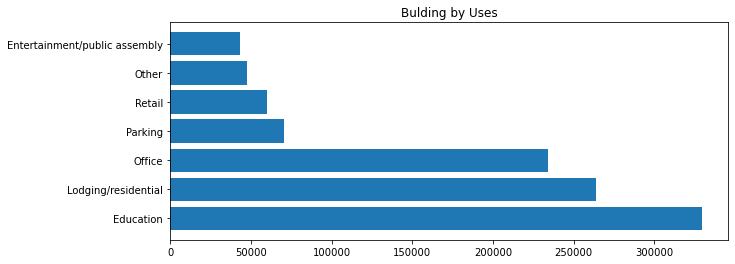

In [141]:
plt.figure(figsize = (10, 4))
plt.barh(buildinguse.primary_use, buildinguse.no_of_buildings,  align='center', data=buildinguse)
#plt.tick_params(axis='x', rotation=90)
plt.title("Bulding by Uses")
plt.show()

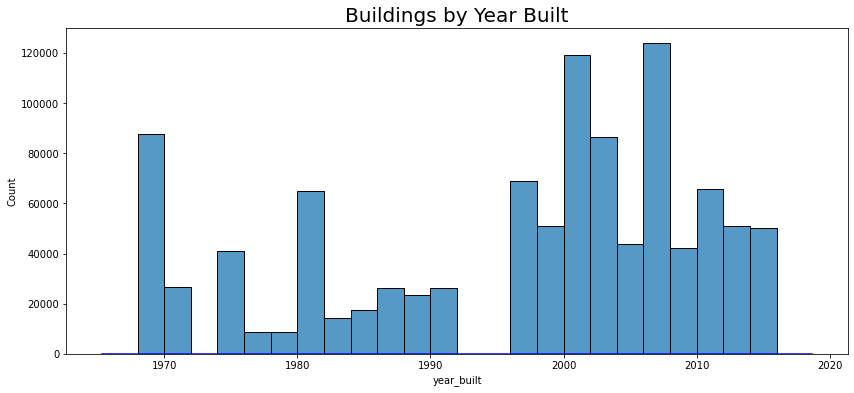

In [142]:
plt.figure (figsize = (14,6))
penguins = sns.load_dataset("penguins")
sns.histplot(data=df, x="year_built", binwidth=2, bins = 50)
sns.distplot(df['year_built'], color = 'blue')
plt.title('Buildings by Year Built', size = 20)
plt.show()

In [145]:
annualenergy = df.groupby("year_built", as_index  = False)["meter_reading"].sum() 
annualenergy = annualenergy.sort_values(["meter_reading"], ascending = False)
annualenergy.rename(columns = {'meter_reading': 'Energy_Used'}, inplace = True)
annualenergy.head(10)

,year_built,Energy_Used
27,2006,8.804346e+07
30,2009,7.319258e+07
28,2007,5.807715e+07
22,2001,4.774478e+07
33,2013,2.856542e+07
20,1999,2.804741e+07
17,1996,2.614427e+07
14,1989,2.610596e+07
31,2010,2.212682e+07
24,2003,2.201843e+07


In [146]:
#plt.bar("year_built", "Energy_Used", width=0.8,  data=df)
#plt.show()

Energy rate by building 

Energy by year

Energy by types of building

In [147]:
Energybybuilding = pd.DataFrame(df2.groupby(['primary_use'])['meter_reading'].agg(['sum','count']).reset_index())
Energybybuilding.rename(columns = {'sum': 'Energy_Used','count': 'No_of_Buildings'}, inplace = True)
Energybybuilding = Energybybuilding.sort_values('Energy_Used', ascending = False).head()
Energybybuilding["avg_per_building"] = Energybybuilding.Energy_Used/Energybybuilding.No_of_Buildings
Energybybuilding

,primary_use,Energy_Used,No_of_Buildings,avg_per_building
0,Education,3.385265e+08,329346,1027.875001
2,Lodging/residential,1.242663e+08,263621,471.382389
3,Office,6.785761e+07,234160,289.791626
4,Other,2.169883e+07,47654,455.341276
1,Entertainment/public assembly,1.600554e+07,43564,367.402987


In [148]:
df.groupby(['primary_use', 'building_id'])['square_feet'].sum() # trying to get the sqft of each unique building ***

primary_use  building_id
Education    0                65282688
             1                23892480
             2                47222784
             3               208049040
             4              1024275888
                               ...    
Retail       44                2485872
             45              134415032
             46               79451280
             47              278122478
             89             1420855920
Name: square_feet, Length: 103, dtype: int64

In [149]:
Energybysqft = pd.DataFrame(df2.groupby(['primary_use'])['meter_reading','square_feet']
                            .agg({'meter_reading':'sum', 'square_feet':"sum" }).reset_index())
Energybysqft.rename(columns = {'meter_reading': 'Energy_Used','square_feet': 'square_feet'}, inplace = True)
#Energybysqft = Energybysqft.sort_values('Energy_Used', ascending = False).head()
Energybysqft["avg_energy_per_sqft"] = Energybysqft.Energy_Used/Energybysqft.square_feet
Energybysqft

,primary_use,Energy_Used,square_feet,avg_energy_per_sqft
0,Education,3.385265e+08,23948380908,0.014136
1,Entertainment/public assembly,1.600554e+07,4926954448,0.003249
2,Lodging/residential,1.242663e+08,21152910635,0.005875
3,Office,6.785761e+07,9060821238,0.007489
4,Other,2.169883e+07,2170364121,0.009998
5,Parking,4.564820e+06,28116696816,0.000162
6,Retail,1.251398e+07,2862829422,0.004371


In [113]:
meter = df.groupby("meter", as_index  = False)["meter_reading"].sum() #Checking for the meter type and how they consume energy
meter = meter.sort_values(by = ["meter_reading"], ascending = False)
meter

,meter,meter_reading
1,1,3.825509e+08
0,0,2.028827e+08


<Figure size 720x576 with 0 Axes>

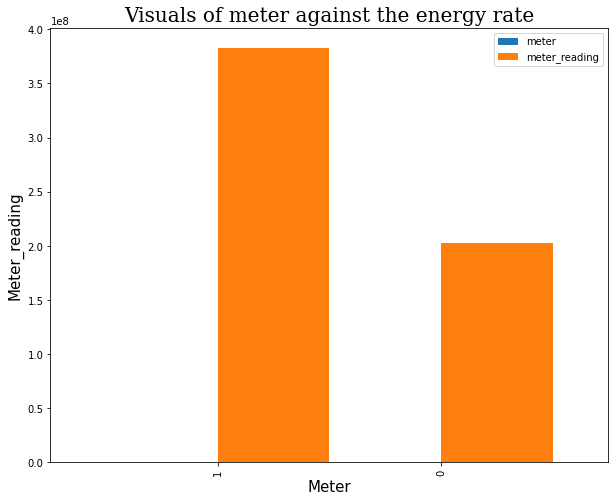

In [114]:
plt.figure(figsize = (10,8))
meter.plot.bar(figsize = (10,8), width = 1)
plt.xlabel('Meter', size = 15)
plt.title("Visuals of meter against the energy rate",size = 20, family = 'serif')
plt.ylabel("Meter_reading", size = 15)
#plt.xticks(rotation = 90)
plt.show()

In [115]:
meterbrkdwn = pd.pivot_table(df, index = ["primary_use"], columns = ['meter'], values  = ['meter_reading'], aggfunc = 'sum')
meterbrkdwn #Energy Consumption by primary use of building base on meter type

meter_reading              
meter                                     0             1
primary_use                                              
Education                      8.960344e+07  2.489231e+08
Entertainment/public assembly  1.600554e+07           NaN
Lodging/residential            4.245677e+07  8.180952e+07
Office                         3.146556e+07  3.639205e+07
Other                          7.730486e+06  1.396835e+07
Parking                        4.564820e+06           NaN
Retail                         1.105612e+07  1.457858e+06

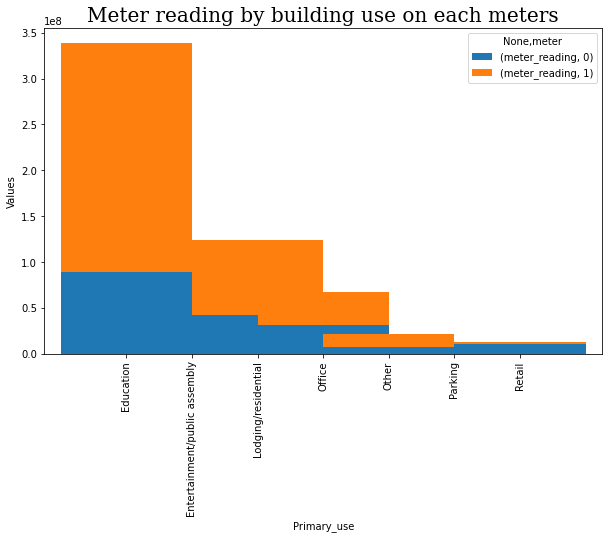

In [116]:
meterbrkdwn.plot.bar(figsize = (10,6), width = 2, stacked = True)
plt.title("Meter reading by building use on each meters", family = 'serif', size = 20)
plt.xlabel("Primary_use", size = 10)
plt.ylabel("Values", size = 10)
plt.show()

### Checking for correlation in the variables in the data

In [150]:
correlatn = df[['building_id', 'square_feet', 'year_built',  'air_temperature', 'cloud_coverage',
                    'dew_temperature', 'precip_depth_1_hr','sea_level_pressure','wind_direction','wind_speed', 
                    'meter', 'meter_reading']].corr()
correlatn

,building_id,square_feet,year_built,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed,meter,meter_reading
building_id,1.000000,0.169070,0.010482,0.002845,0.000445,0.001965,0.000184,-0.000398,-0.000378,-0.001063,0.043674,0.022832
square_feet,0.169070,1.000000,0.172601,-0.000166,-0.000560,0.000331,-0.000035,0.000404,0.000020,0.000412,0.006368,0.106520
year_built,0.010482,0.172601,1.000000,0.010999,0.000265,0.012111,0.000110,-0.002110,-0.003272,-0.002177,0.088126,0.130023
air_temperature,0.002845,-0.000166,0.010999,1.000000,0.295912,0.717020,-0.000688,-0.315214,-0.211292,0.091966,0.088819,0.171254
cloud_coverage,0.000445,-0.000560,0.000265,0.295912,1.000000,0.296416,0.138508,-0.187190,-0.062456,0.115347,0.004831,0.037039
dew_temperature,0.001965,0.000331,0.012111,0.717020,0.296416,1.000000,0.066802,-0.366631,-0.265391,-0.168157,0.084714,0.183738
precip_depth_1_hr,0.000184,-0.000035,0.000110,-0.000688,0.138508,0.066802,1.000000,-0.080515,0.011444,0.045101,0.001323,0.002696
sea_level_pressure,-0.000398,0.000404,-0.002110,-0.315214,-0.187190,-0.366631,-0.080515,1.000000,-0.112328,-0.145828,-0.016235,-0.045407
wind_direction,-0.000378,0.000020,-0.003272,-0.211292,-0.062456,-0.265391,0.011444,-0.112328,1.000000,0.225566,-0.023390,-0.043802
wind_speed,-0.001063,0.000412,-0.002177,0.091966,0.115347,-0.168157,0.045101,-0.145828,0.225566,1.000000,-0.019263,-0.035115


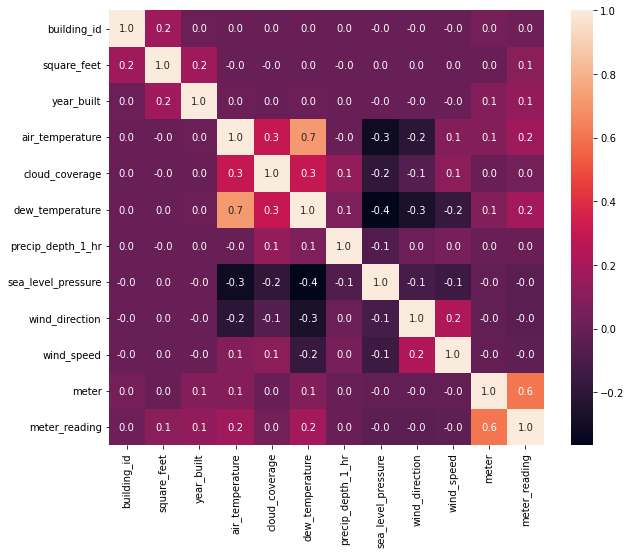

In [151]:
plt.figure (figsize = (10,8)) #Visuals of how variables correlate
sns.heatmap(correlatn, cbar = True , square = True, fmt = '.1f', annot = True, annot_kws = { 'size' : 10}) ##, ##cmap = 'reds')
plt.show()

In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 14 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   building_id         1048575 non-null  int64  
 1   primary_use         1048575 non-null  object 
 2   square_feet         1048575 non-null  int64  
 3   year_built          1048575 non-null  int64  
 4   timestamp           1048575 non-null  object 
 5   air_temperature     1048272 non-null  float64
 6   cloud_coverage      593261 non-null   float64
 7   dew_temperature     1048272 non-null  float64
 8   precip_depth_1_hr   1048474 non-null  float64
 9   sea_level_pressure  1038535 non-null  float64
 10  wind_direction      1018126 non-null  float64
 11  wind_speed          1048575 non-null  float64
 12  meter               1048575 non-null  int64  
 13  meter_reading       1048575 non-null  float64
dtypes: float64(8), int64(4), object(2)
memory usage: 112.0+ MB


<Figure size 792x504 with 0 Axes>

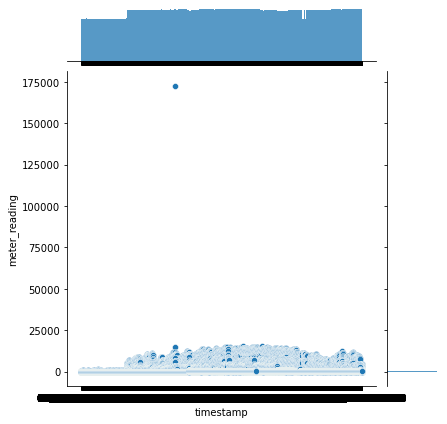

In [154]:
plt.figure(figsize=(11,7))
sns.jointplot(x='timestamp',y='meter_reading',data=df)

### Data Preprocessing 

In [156]:
df.isna().sum()

building_id                0
primary_use                0
square_feet                0
year_built                 0
timestamp                  0
air_temperature          303
cloud_coverage        455314
dew_temperature          303
precip_depth_1_hr        101
sea_level_pressure     10040
wind_direction         30449
wind_speed                 0
meter                      0
meter_reading              0
dtype: int64

In [242]:
df[['wind_direction', 'sea_level_pressure', 'precip_depth_1_hr', 'dew_temperature', 'cloud_coverage', 'air_temperature']] = df[['wind_direction', 'sea_level_pressure', 'precip_depth_1_hr', 'dew_temperature', 'cloud_coverage', 'air_temperature']].interpolate()

In [243]:
df.isnull().sum()

building_id           0
primary_use           0
square_feet           0
year_built            0
timestamp             0
air_temperature       0
cloud_coverage        0
dew_temperature       0
precip_depth_1_hr     0
sea_level_pressure    0
wind_direction        0
wind_speed            0
meter                 0
meter_reading         0
dtype: int64

In [244]:
df = df.dropna()

In [245]:
df['year_built'] = df['year_built'].astype(int) #converting to int so it can be readable for ML
df['timestamp'] = pd.to_datetime(df['timestamp']).astype(np.int64)

In [246]:
df.replace({'primary_use' : {'Education' : 1, 'Lodging/residential' : 2, 
                                'Office' : 3, 'Entertainment/public assembly' : 4, 'Retail' : 5,  
                                'Parking' : 6, 'Other' : 7,}}, inplace = True) #Encoding primary use variable

In [247]:
df.primary_use.unique()

array([1, 2, 3, 4, 7, 5, 6], dtype=int64)

### Building The Model

In [248]:
X = df.drop(columns = ['meter_reading'], axis = 1) #all columns except meter reading
y = df['meter_reading'] # meter reding column - the dependent variable 

In [249]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 101) 

In [250]:
print(X_train.shape)
print(y_train.shape)

(734001, 13)
(734001,)


In [251]:
model = RandomForestRegressor(n_estimators = 3) #calling a random regressor model

In [252]:
model = model.fit(X_train, y_train) #Fitting the variables into the model

####  Evaluating Model Accuracy

In [253]:
predictions = model.predict(X_test) #Evaluating the model accuracy

In [254]:
error_score = metrics.r2_score(predictions,  y_test)

In [256]:
error_score

0.8568052963014118

### Predicting the Model

In [257]:
train_predict = model.predict(X_train)

In [258]:
error_score_train = metrics.r2_score(train_predict,  y_train)

In [259]:
error_score

0.8568052963014118

---

Conclusion

Considering the rapid changes in technology in the energy sector over the years that has disrupted the traditional ways of using energy with the override principle of renewable energy and sustainability, a model with 85% accuracy is score is usable to preidict furture energy consumtption 